In [1]:
import os
import glob

import pandas as pd
from skimage import io

import matplotlib.pyplot as plt
import matplotlib.colors as cmap

In [2]:
folder = "../Example/Nancy_Foster_2022_Samples/"

assert os.path.exists(folder), print("Folder not found: ", folder)

In [3]:
csv_file = folder + "CNNDataExtractor-2022_12_07_14_08_02.txt"

assert os.path.exists(csv_file), print("File not found: ", csv_file)

In [4]:
csv = pd.read_csv(csv_file, header=None, delimiter="\t")
csv.columns = ['File_Path', 'Column', 'Row', 'Label']

csv.head(5)

,File_Path,Column,Row,Label
0,C:\Users\jordan.pierce\Documents\GitHub\CoralN...,2059,927,Fish_A_0000.bmp
1,C:\Users\jordan.pierce\Documents\GitHub\CoralN...,1607,854,Fish_A_0001.bmp
2,C:\Users\jordan.pierce\Documents\GitHub\CoralN...,1812,896,Fish_A_0002.bmp
3,C:\Users\jordan.pierce\Documents\GitHub\CoralN...,2063,966,Fish_A_0003.bmp
4,C:\Users\jordan.pierce\Documents\GitHub\CoralN...,2225,997,Fish_A_0004.bmp


In [5]:
csv['Name'] = [os.path.basename(_) for _ in csv['File_Path'].values]
csv['Label'] = [_.split("_")[0] for _ in csv['Label'].values]

csv.head(5)

,File_Path,Column,Row,Label,Name
0,C:\Users\jordan.pierce\Documents\GitHub\CoralN...,2059,927,Fish,Dive 018_0003_083132.JPG
1,C:\Users\jordan.pierce\Documents\GitHub\CoralN...,1607,854,Fish,Dive 018_0003_083132.JPG
2,C:\Users\jordan.pierce\Documents\GitHub\CoralN...,1812,896,Fish,Dive 018_0003_083132.JPG
3,C:\Users\jordan.pierce\Documents\GitHub\CoralN...,2063,966,Fish,Dive 018_0003_083132.JPG
4,C:\Users\jordan.pierce\Documents\GitHub\CoralN...,2225,997,Fish,Dive 018_0003_083132.JPG


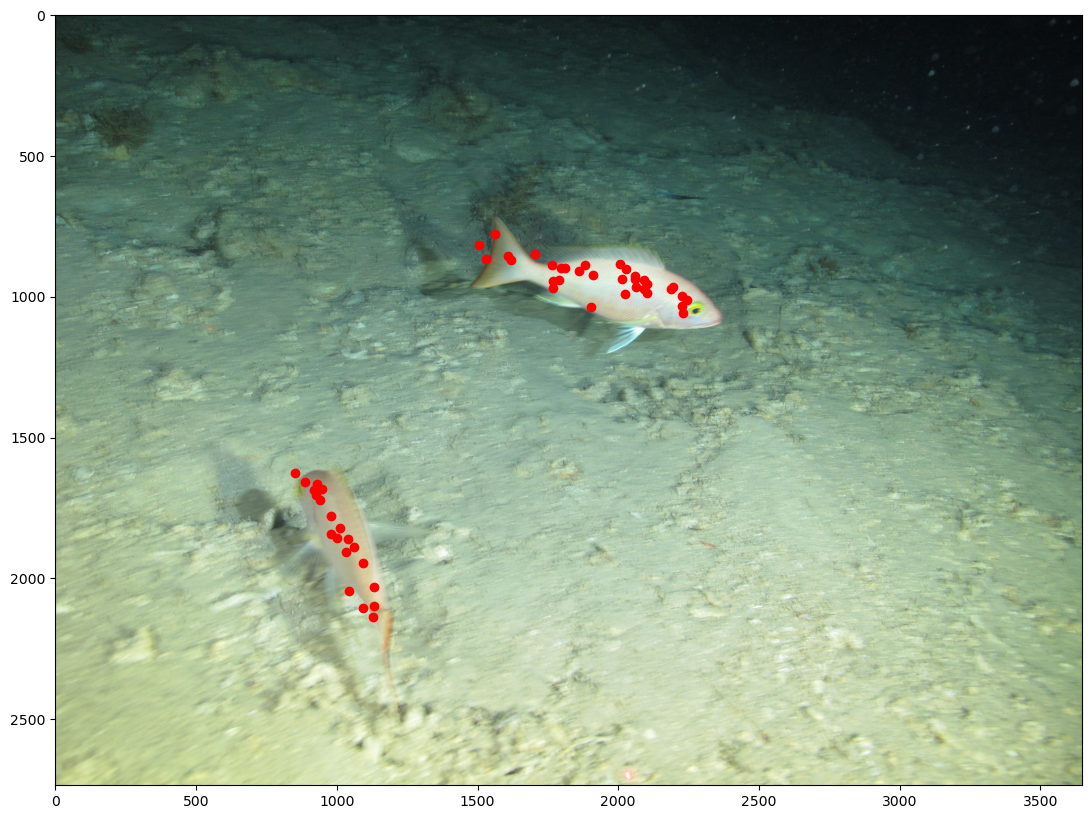

In [6]:
image_path = csv.iloc[0]['File_Path']
records = csv[csv['File_Path'] == image_path]

img = io.imread(image_path)

plt.figure(figsize = (20, 10))
plt.imshow(img)
plt.scatter(records['Column'].values, records['Row'].values, c='red')
plt.show()

Labeled Images:  5
Labels:  ['Fish' 'Sand']
Label Count:  (136,)


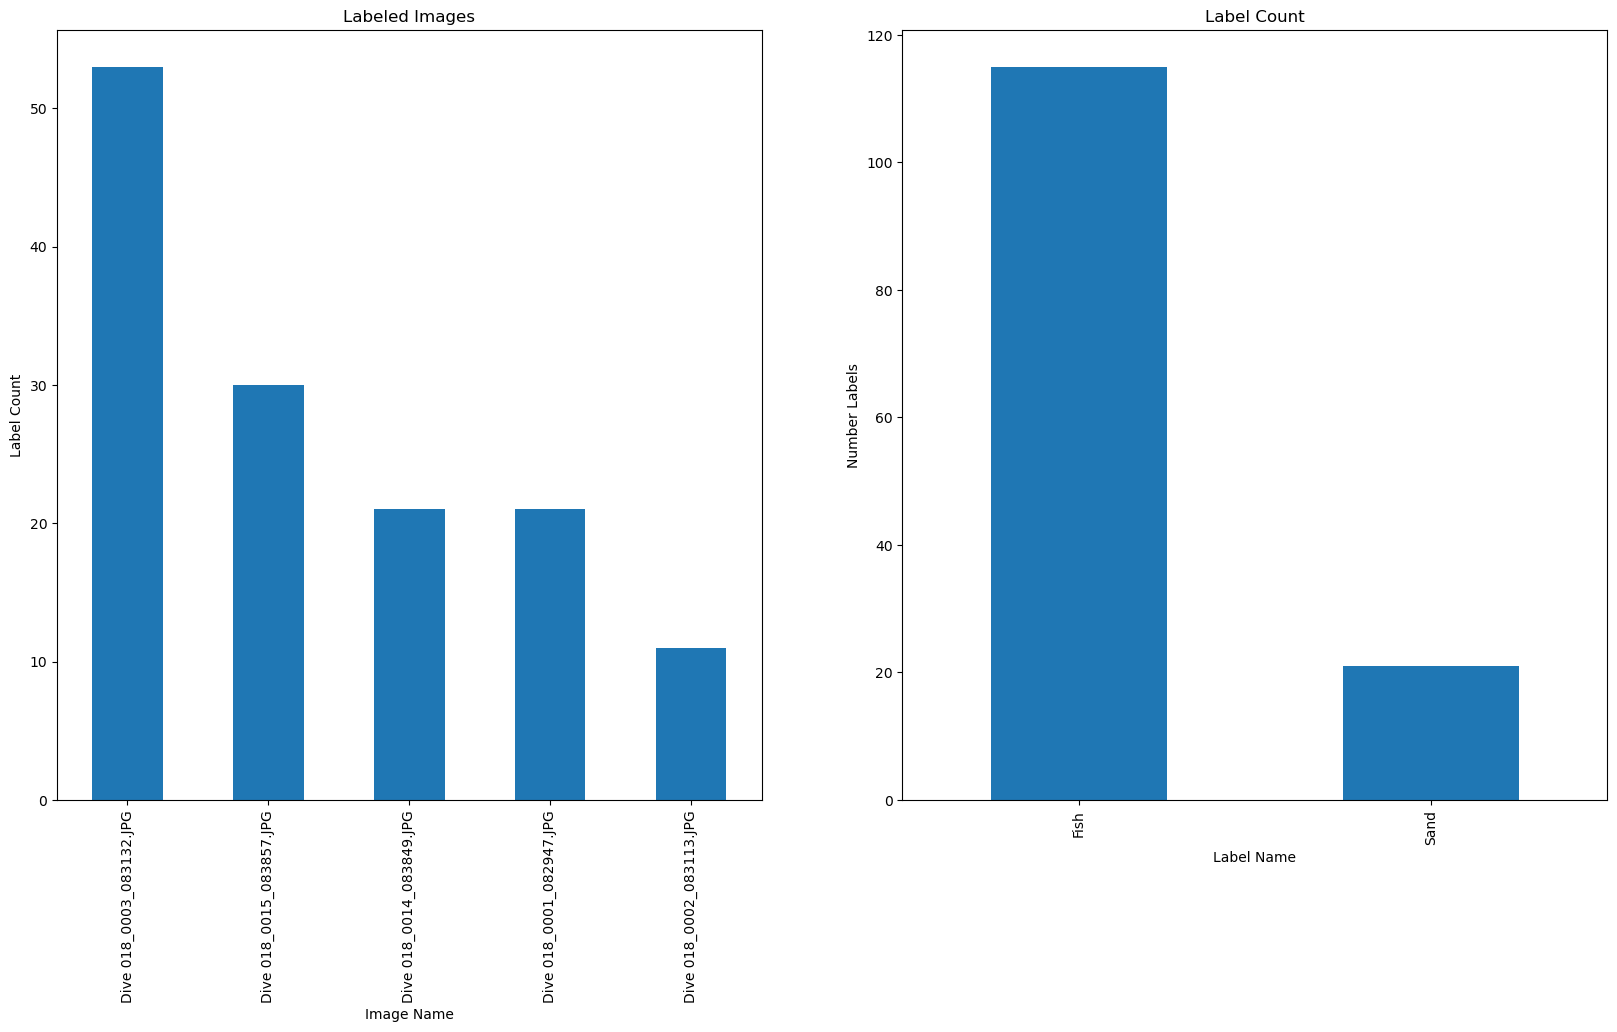

In [7]:
print("Labeled Images: ", len(csv['File_Path'].unique()))
print("Labels: ", csv['Label'].unique())
print("Label Count: ", csv['Label'].values.shape)


plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.title("Labeled Images")
plt.xlabel("Image Name")
plt.ylabel("Label Count")
csv['Name'].value_counts().plot(kind='bar')

plt.subplot(1,2,2)
plt.title("Label Count")
plt.xlabel("Label Name")
plt.ylabel("Number Labels")
csv['Label'].value_counts().plot(kind='bar')

plt.show()

In [8]:
csv.to_csv(csv_file.replace(".txt", ".csv"), index=0)

if os.path.exists(csv_file.replace(".txt", ".csv")):
    print("File created: ", csv_file.replace(".txt", ".csv"))

File created:  ../Example/Nancy_Foster_2022_Samples/CNNDataExtractor-2022_12_07_14_08_02.csv
